In [17]:
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up visualization style
sns.set_style("whitegrid")
%matplotlib inline

In [18]:
# Loading the dataset
df = pd.read_csv('airline_2m.csv', encoding='latin1')
df.head()

<ipython-input-18-ecb4fa4115d1>:2: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airline_2m.csv', encoding='latin1')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Check basic dataset info
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Shape: (2000000, 109)

Column Names and Data Types:
Year                  int32
Quarter               int64
Month                 int32
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5WheelsOn        float64
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Length: 109, dtype: object

Missing Values per Column:
Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
                     ...   
Div5WheelsOn        2000000
Div5TotalGTime      2000000
Div5LongestGTime    2000000
Div5WheelsOff       2000000
Div5TailNum         2000000
Length: 109, dtype: int64


In [20]:
# Converting FlightDate to datetime for time-based analysis
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Adding year and month column for time series exploration
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month

# Summary statistics for numerical columns
print("Summary Statistics:")
print(df[['ArrDelay', 'ArrDelayMinutes', 'DepDelay', 'DepDelayMinutes']].describe())

Summary Statistics:
           ArrDelay  ArrDelayMinutes      DepDelay  DepDelayMinutes
count  1.958922e+06     1.958922e+06  1.963932e+06     1.963932e+06
mean   6.205467e+00     1.179442e+01  8.587405e+00     1.049667e+01
std    3.483340e+01     3.197121e+01  3.272473e+01     3.196467e+01
min   -7.060000e+02     0.000000e+00 -9.900000e+02     0.000000e+00
25%   -1.000000e+01     0.000000e+00 -3.000000e+00     0.000000e+00
50%   -1.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00
75%    1.000000e+01     1.000000e+01  7.000000e+00     7.000000e+00
max    1.898000e+03     1.898000e+03  1.878000e+03     1.878000e+03


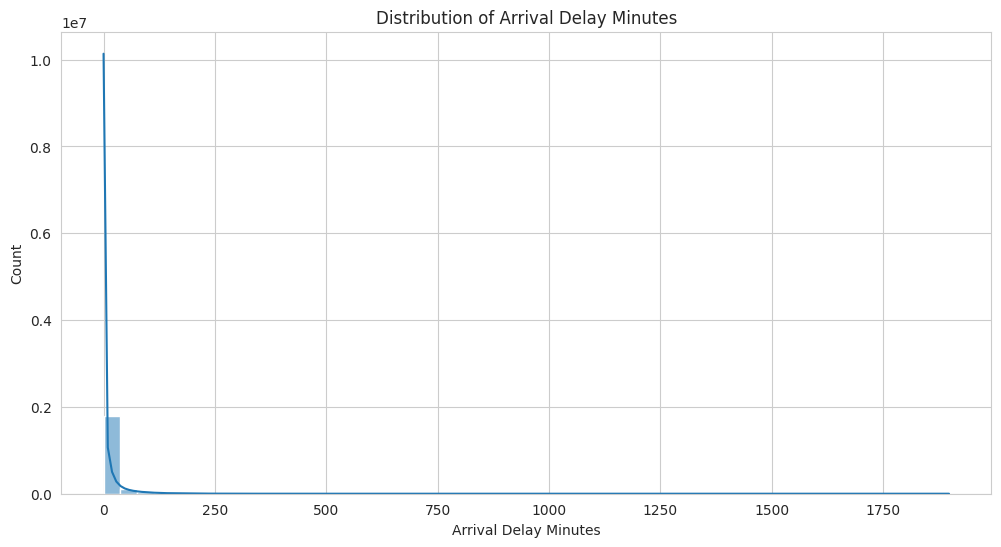

In [21]:
# Exploring delay distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ArrDelayMinutes', bins=50, kde=True)
plt.title('Distribution of Arrival Delay Minutes')
plt.xlabel('Arrival Delay Minutes')
plt.ylabel('Count')
plt.show()

Number of flights with significant delays (> 15 mins): 369940
Proportion of significant delays: 18.50%


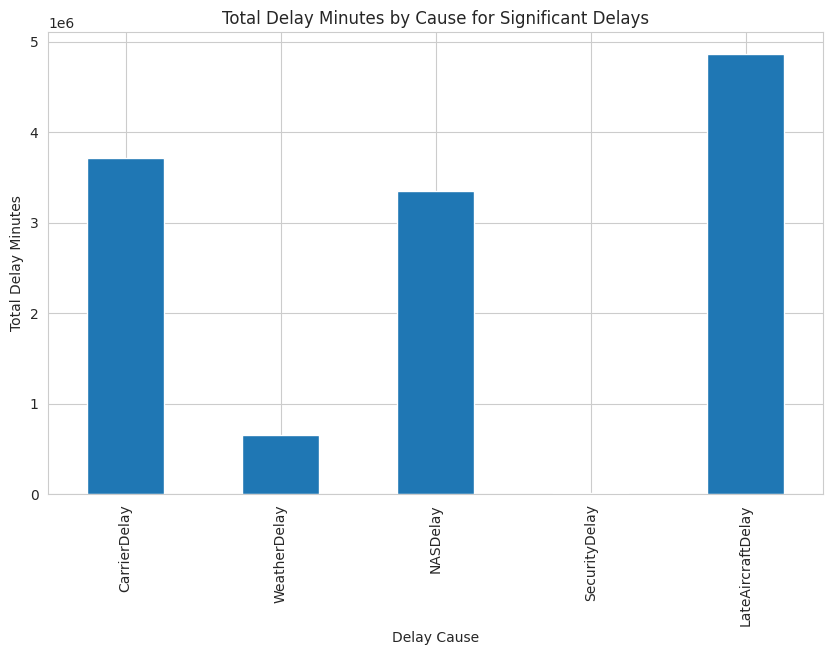

In [22]:
# Checking for significant delays (> 15 minutes)
significant_delays = df[df['ArrDelayMinutes'] > 15]
print(f"Number of flights with significant delays (> 15 mins): {len(significant_delays)}")
print(f"Proportion of significant delays: {len(significant_delays) / len(df):.2%}")

# Plotting delay causes for significant delays
delay_causes = significant_delays[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()
plt.figure(figsize=(10, 6))
delay_causes.plot(kind='bar')
plt.title('Total Delay Minutes by Cause for Significant Delays')
plt.xlabel('Delay Cause')
plt.ylabel('Total Delay Minutes')
plt.show()

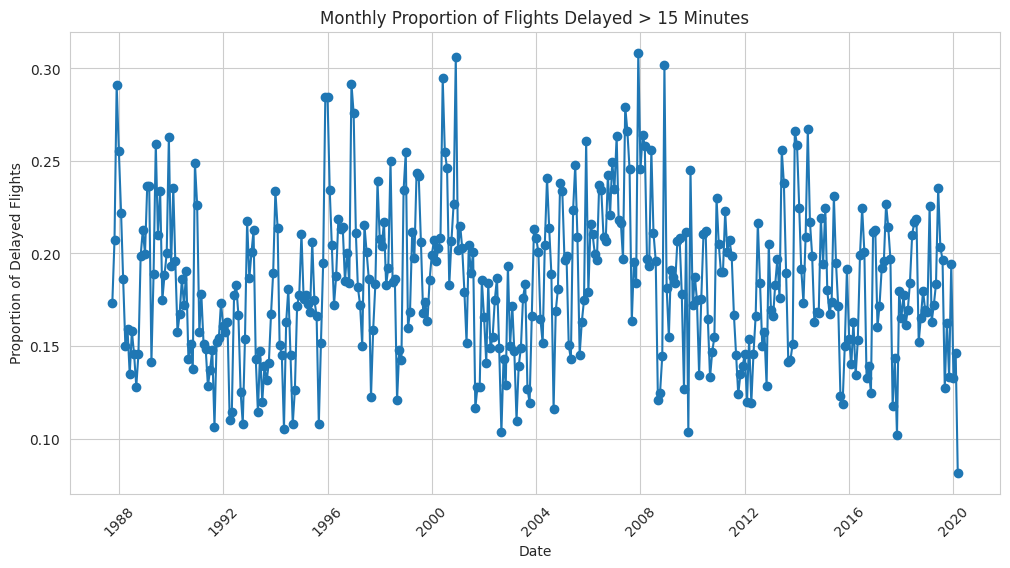

In [23]:
# Time series analysis of delay proportions
monthly_delays = df.groupby(['Year', 'Month'])['ArrDelayMinutes'].apply(lambda x: (x > 15).mean()).reset_index(name='DelayProportion')
monthly_delays['Date'] = pd.to_datetime(monthly_delays[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays['Date'], monthly_delays['DelayProportion'], marker='o')
plt.title('Monthly Proportion of Flights Delayed > 15 Minutes')
plt.xlabel('Date')
plt.ylabel('Proportion of Delayed Flights')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

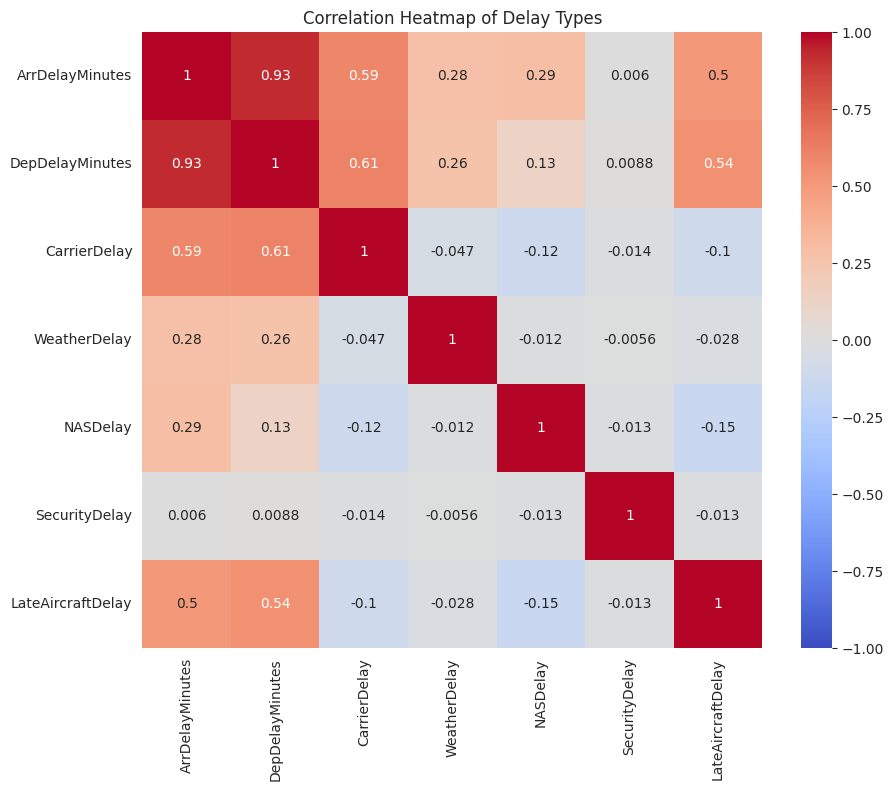

In [24]:
# Correlation analysis between delay types
delay_correlation = df[['ArrDelayMinutes', 'DepDelayMinutes', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(delay_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Delay Types')
plt.show()

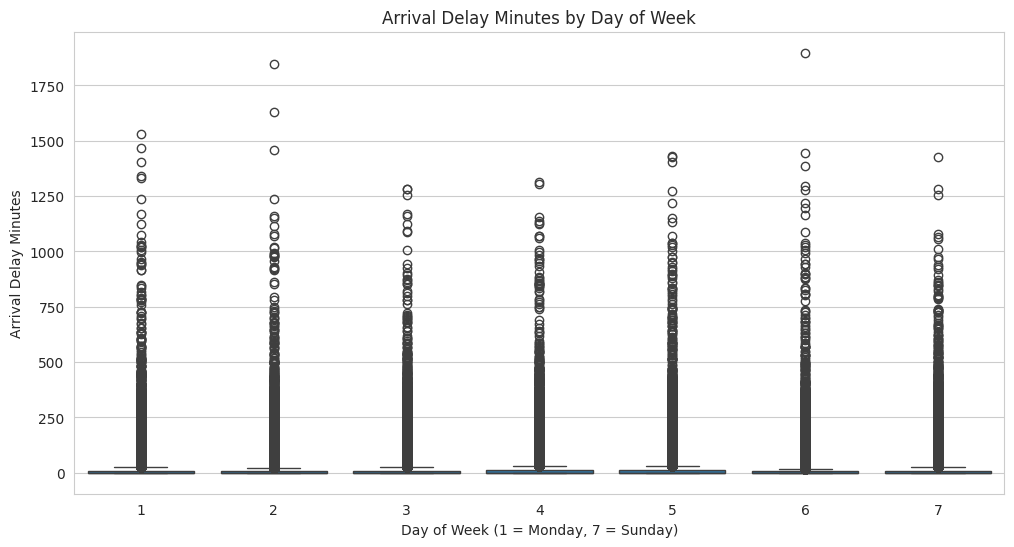

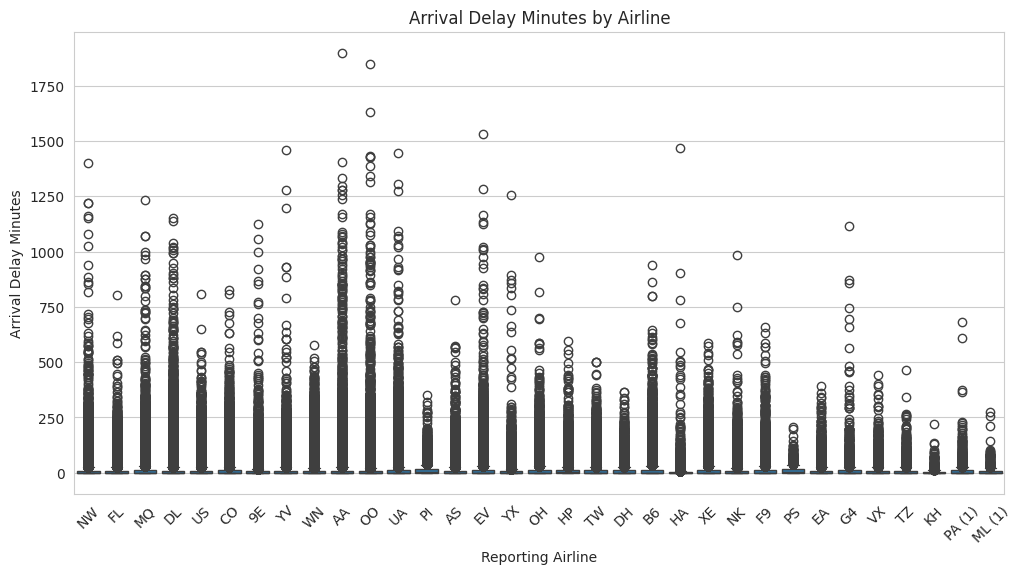

In [25]:
# Exploring delays by airline and day of week
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='DayOfWeek', y='ArrDelayMinutes')
plt.title('Arrival Delay Minutes by Day of Week')
plt.xlabel('Day of Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Arrival Delay Minutes')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Reporting_Airline', y='ArrDelayMinutes')
plt.title('Arrival Delay Minutes by Airline')
plt.xlabel('Reporting Airline')
plt.ylabel('Arrival Delay Minutes')
plt.xticks(rotation=45)
plt.show()